In [1]:
# Cell 1: Import the Module
import sys
sys.path.append('../src')
from eda_class import SolarEDA

In [2]:
# Cell 2: Initialize the EDA Class
data_path = r"C:\Users\Senayit\Documents\tenx\solar-challenge-week1\data\benin-malanville.csv"
eda = SolarEDA(data_path)

In [3]:
# Cell 3: Summary Statistics
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']
eda.summary_statistics(numeric_cols)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,BP,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,994.197199,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,2.474993,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,985.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,993.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,994.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,996.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,1003.000000,81.000000,72.500000


In [4]:
# Cell 4: Missing Values Report
eda.missing_values_report()


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing:
Comments    100.0
dtype: float64


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# Cell 5: Outlier Detection
eda.detect_outliers()


Outliers in GHI (|Z| > 3): 89

Outliers in DNI (|Z| > 3): 0

Outliers in DHI (|Z| > 3): 3738

Outliers in ModA (|Z| > 3): 27

Outliers in ModB (|Z| > 3): 63

Outliers in WS (|Z| > 3): 3109

Outliers in WSgust (|Z| > 3): 3500


{'GHI': 89,
 'DNI': 0,
 'DHI': 3738,
 'ModA': 27,
 'ModB': 63,
 'WS': 3109,
 'WSgust': 3500}

In [6]:
# Cell 6: Clean Data
eda.clean_data('data/benin_clean.csv')


Cleaned Data Shape: (525600, 19)
Cleaned data saved to data/benin_clean.csv


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


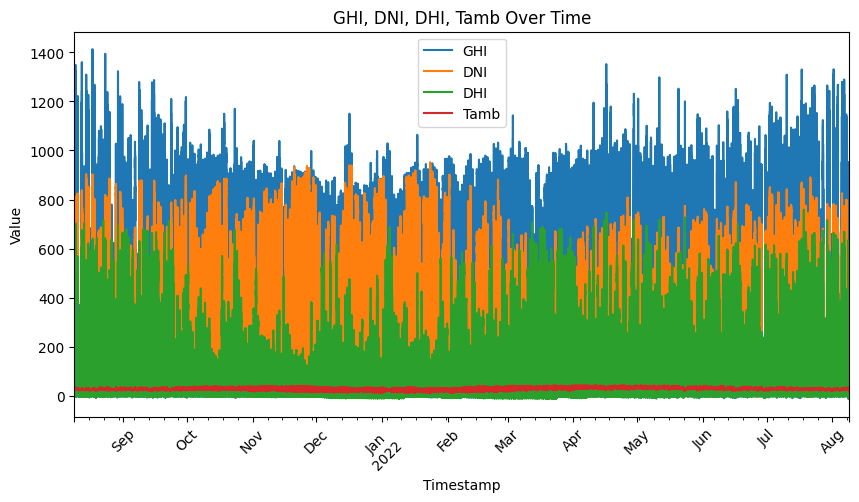

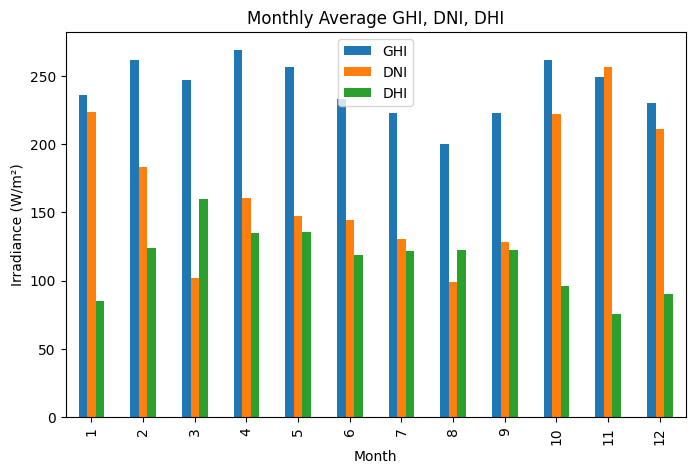

In [7]:
# Cell 7: Time Series Analysis
eda.time_series_analysis()

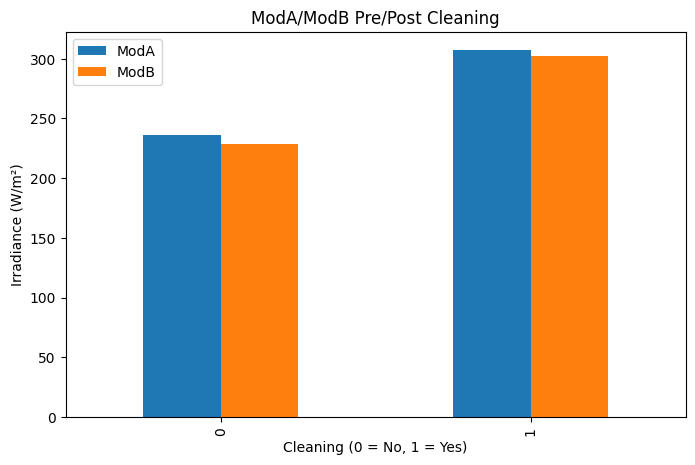

In [8]:
# Cell 8: Cleaning Impact
eda.cleaning_impact()

In [9]:
# Cell 9: Correlation Analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
eda.correlation_analysis(corr_cols)


Correlation Matrix:
            GHI       DNI       DHI     TModA     TModB
GHI    1.000000  0.882376  0.849989  0.920127  0.874338
DNI    0.882376  1.000000  0.546602  0.790340  0.756007
DHI    0.849989  0.546602  1.000000  0.825012  0.777829
TModA  0.920127  0.790340  0.825012  1.000000  0.983443
TModB  0.874338  0.756007  0.777829  0.983443  1.000000


,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.882376,0.849989,0.920127,0.874338
DNI,0.882376,1.000000,0.546602,0.790340,0.756007
DHI,0.849989,0.546602,1.000000,0.825012,0.777829
TModA,0.920127,0.790340,0.825012,1.000000,0.983443
TModB,0.874338,0.756007,0.777829,0.983443,1.000000


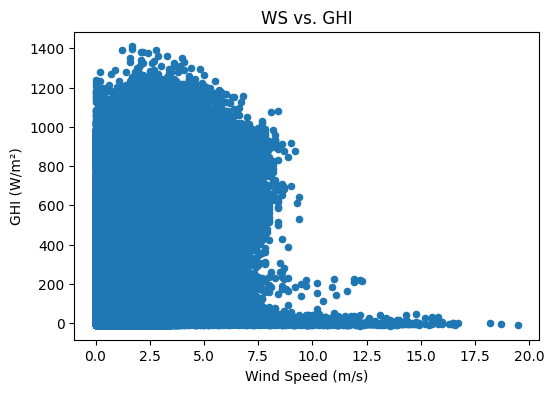

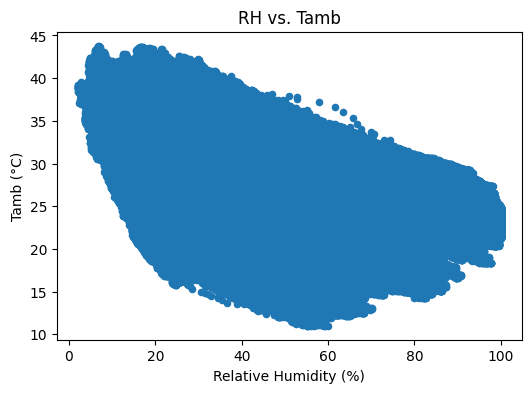

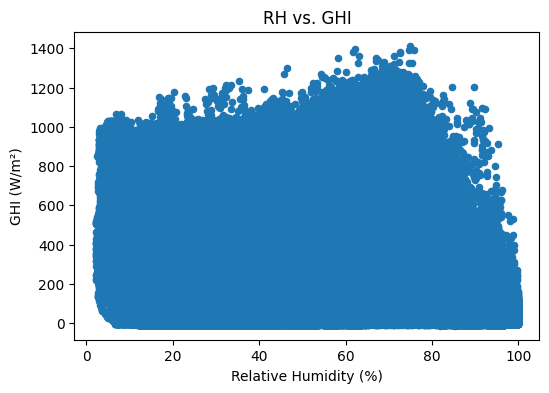

In [10]:
# Cell 10: Scatter Plots
eda.scatter_plots()

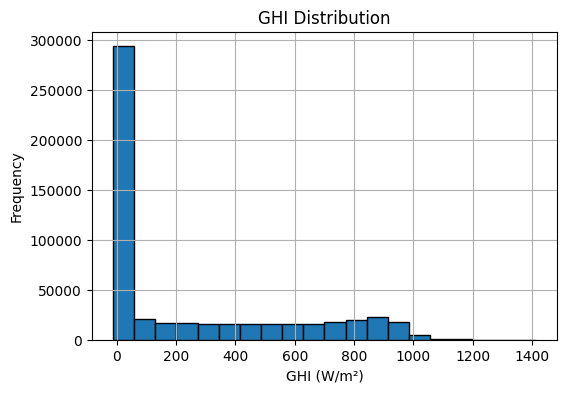

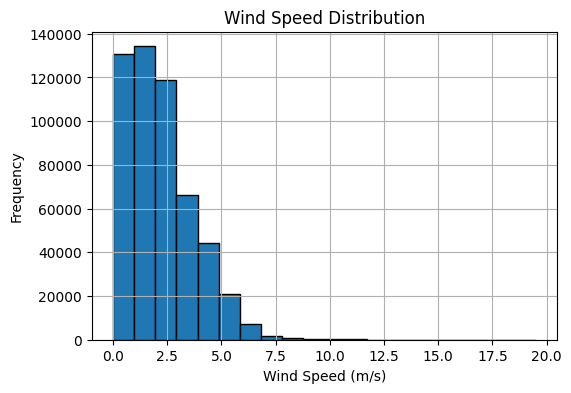

In [11]:
# Cell 11: Distribution Analysis
eda.distribution_analysis()

In [12]:
# Cell 12: Temperature and Humidity Analysis
eda.temperature_humidity_analysis()


Average GHI by RH Range:
RH_bin
0-25      435.523726
25-50     232.684491
50-75     286.002644
75-100     74.049788
Name: GHI, dtype: float64


c:\Users\Senayit\Documents\tenx\solar-challenge-week1\notebooks\../src\eda_class.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ghi_by_rh = self.df.groupby('RH_bin')['GHI'].mean()


RH_bin
0-25      435.523726
25-50     232.684491
50-75     286.002644
75-100     74.049788
Name: GHI, dtype: float64